""" this is the EDA for numeric vars"""

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import partial

In [2]:
# Global, all the numeric var in the data
NUMERIC_VAR = ['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',]


In [3]:
def boxplot_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    outliers_bool = (df[col] <= Q1 - 1.5 * IQR) | (df[col] >= Q3 + 1.5 *IQR)
    return df[col][outliers_bool]



In [4]:
train_df = pd.read_csv("C:/Users/weitz/Documents/PhD/ML-project/train_cohort.csv")
print(train_df.head())


   Unnamed: 0  encounter_id  patient_nbr             race  gender      age  \
0           0       2278392      8222157        Caucasian  Female   [0-10)   
1           1        149190     55629189        Caucasian  Female  [10-20)   
2           2         64410     86047875  AfricanAmerican  Female  [20-30)   
3           3        500364     82442376        Caucasian    Male  [30-40)   
4           4         16680     42519267        Caucasian    Male  [40-50)   

  weight  admission_type_id  discharge_disposition_id  admission_source_id  \
0    NaN                  6                        25                    1   
1    NaN                  1                         1                    7   
2    NaN                  1                         1                    7   
3    NaN                  1                         1                    7   
4    NaN                  1                         1                    7   

   ...  tolazamide insulin glyburide-metformin  glipizide-metf

In [5]:
dict_outliers = {}


for col in NUMERIC_VAR:
    dict_outliers.update({col : boxplot_outliers(train_df,col)})

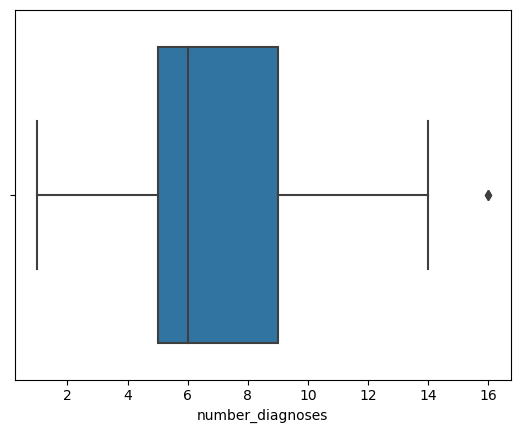

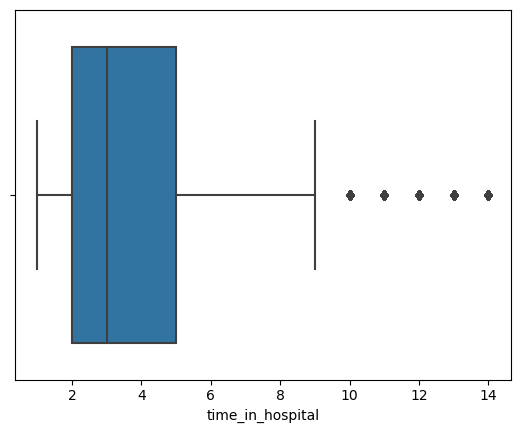

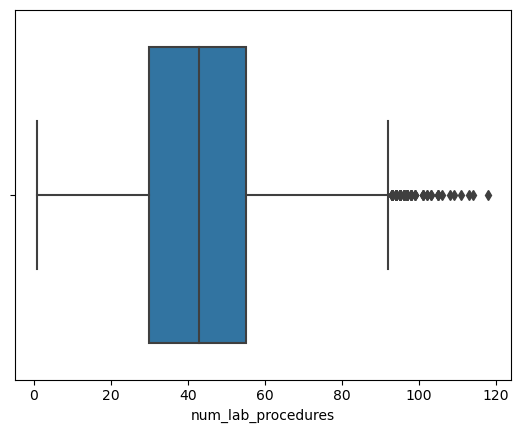

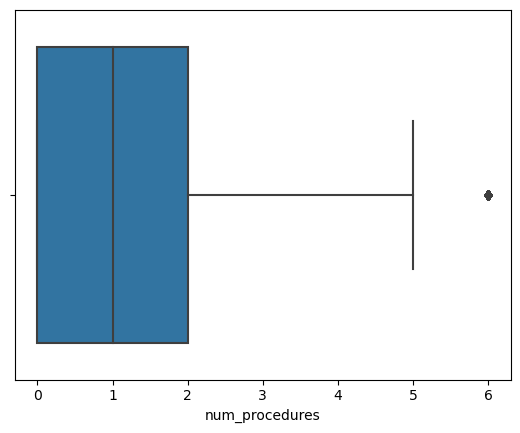

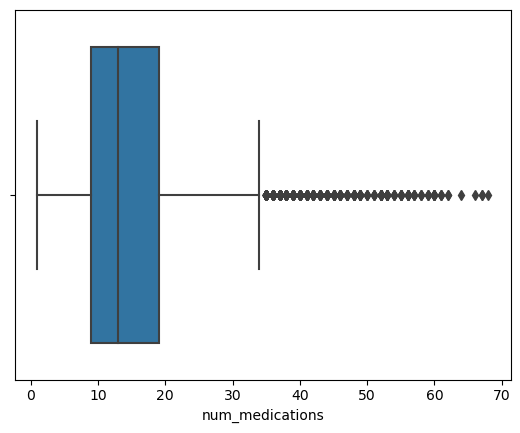

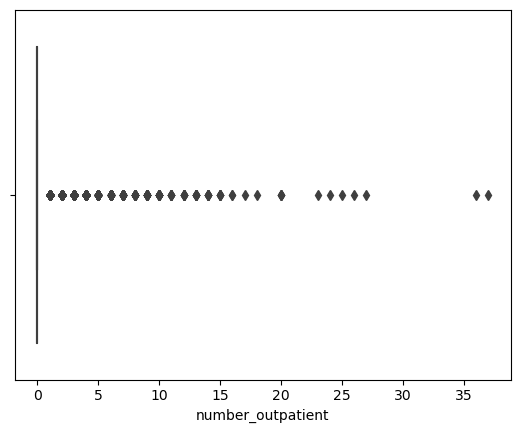

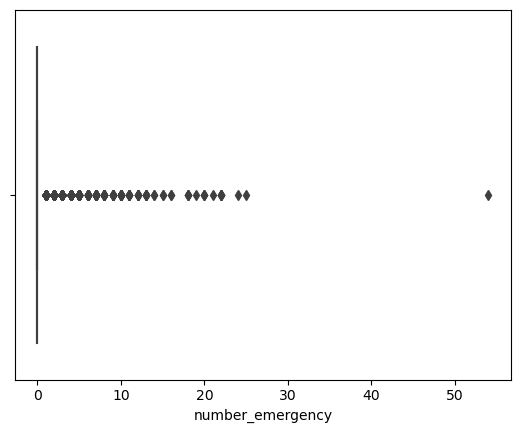

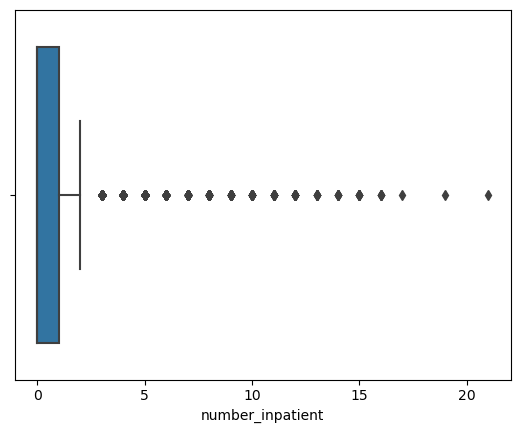

In [6]:
# Creating individual plots
cols = NUMERIC_VAR
for var in cols:
    sns.boxplot(x=var, data=train_df)
    plt.show()

In [9]:
for key, value in dict_outliers.items():
    print (key, len(value), np.unique(value))

number_diagnoses 2 [16]
time_in_hospital 1730 [10 11 12 13 14]
num_lab_procedures 86 [ 93  94  95  96  97  98  99 101 102 103 105 106 108 109 111 113 114 118]
num_procedures 1856 [5 6]
num_medications 683 [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 64 66 67 68]
number_outpatient 30420 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 23 24 25 26
 27 36 37]
number_emergency 30420 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 24 25
 54]
number_inpatient 2043 [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21]


In [14]:
df_long = train_df.melt(id_vars = ['race', 'gender', 'age'], value_vars = NUMERIC_VAR )
display(df_long)

displot = partial(sns.displot, 
                  data=df_long, kind='hist', 
                  x='value', col='variable', 
                  col_wrap=3, common_bins=False,
                  facet_kws={'sharex': False, 'sharey': False})

displot2 = partial(sns.displot,
                  data=train_df, kind='hist',  
                  col_wrap=3,facet_kws={'sharey': False})

,race,gender,age,variable,value
0,Caucasian,Female,[0-10),number_diagnoses,1
1,Caucasian,Female,[10-20),number_diagnoses,9
2,AfricanAmerican,Female,[20-30),number_diagnoses,6
3,Caucasian,Male,[30-40),number_diagnoses,7
4,Caucasian,Male,[40-50),number_diagnoses,5
...,...,...,...,...,...
243355,Caucasian,Female,[40-50),number_inpatient,0
243356,Caucasian,Female,[70-80),number_inpatient,0
243357,Caucasian,Female,[80-90),number_inpatient,0
243358,Other,Male,[40-50),number_inpatient,0


C:\Users\weitz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


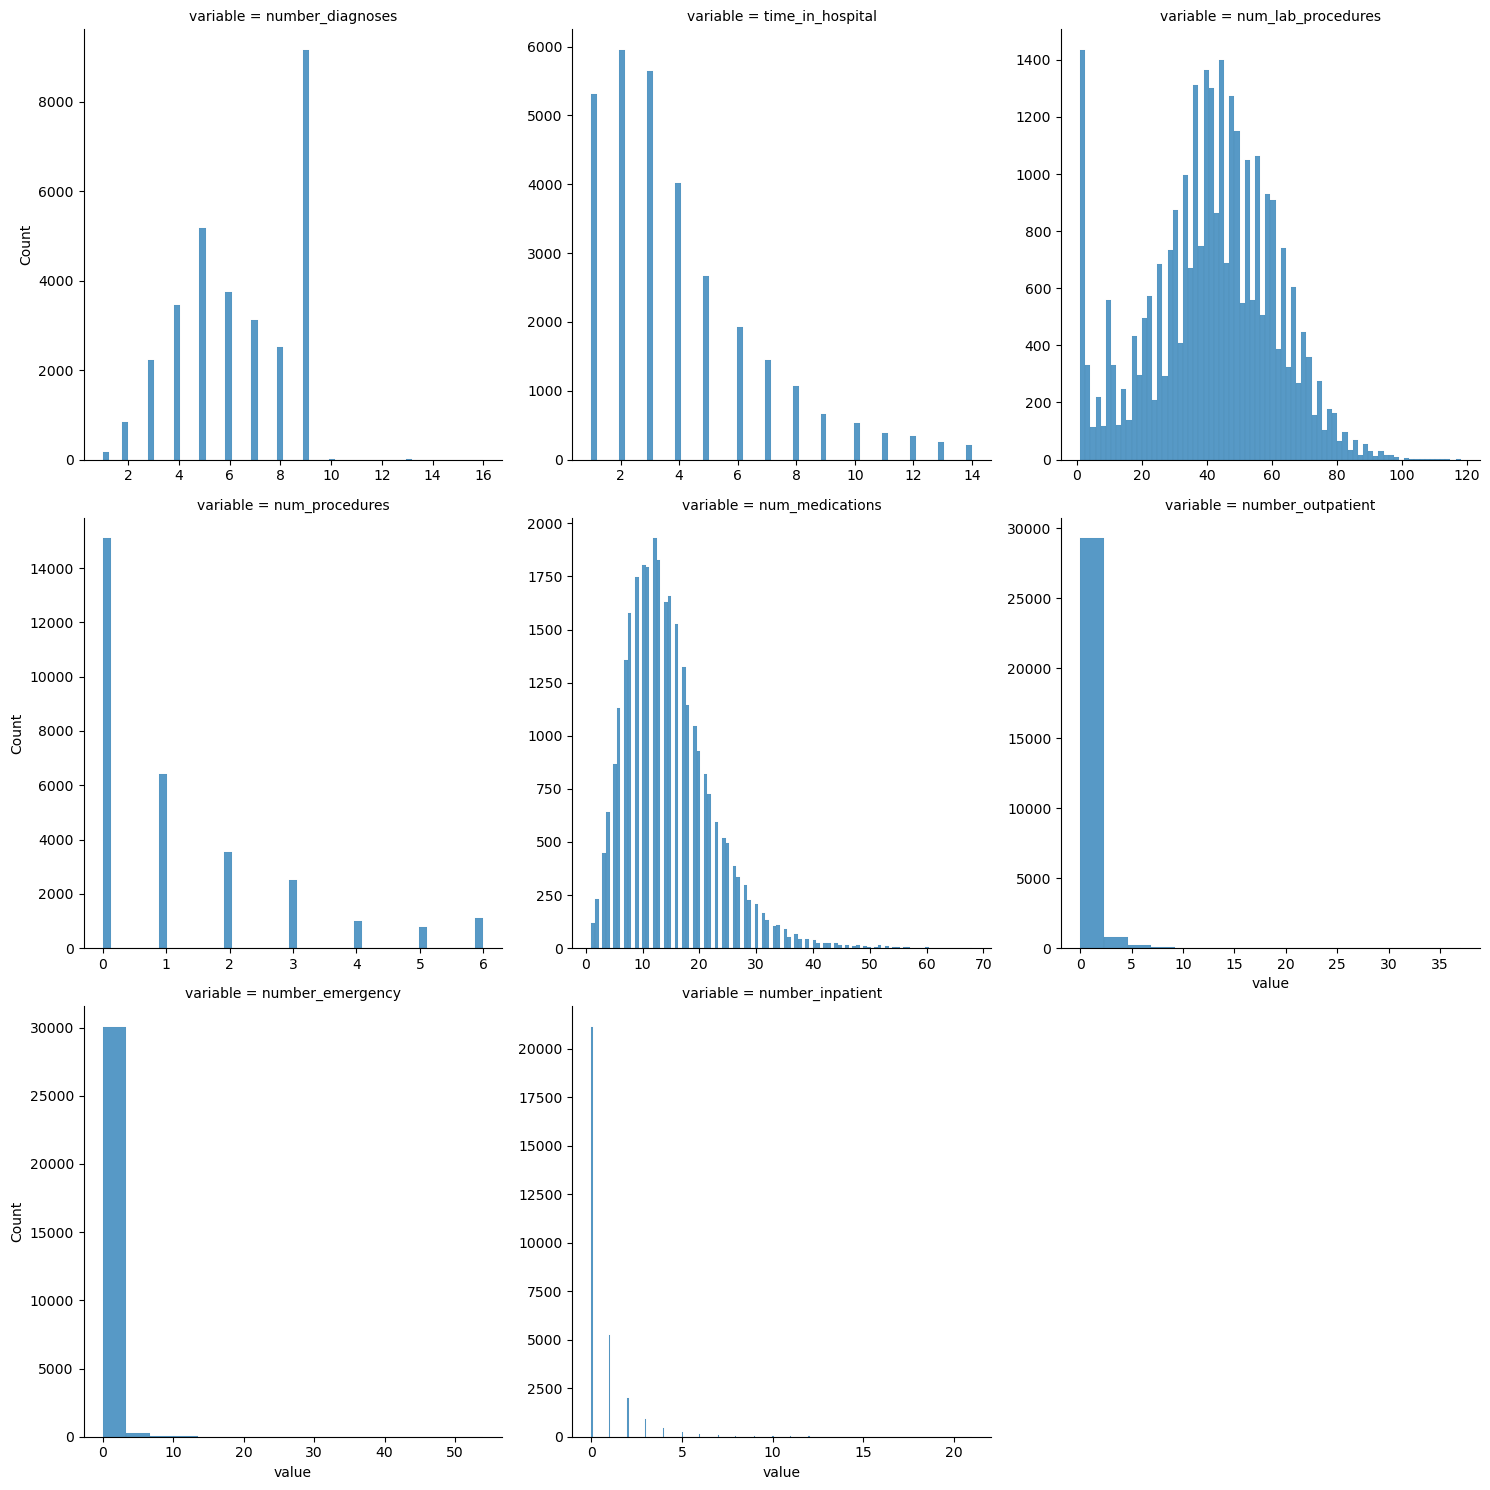

In [15]:
displot()
plt.show()

C:\Users\weitz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


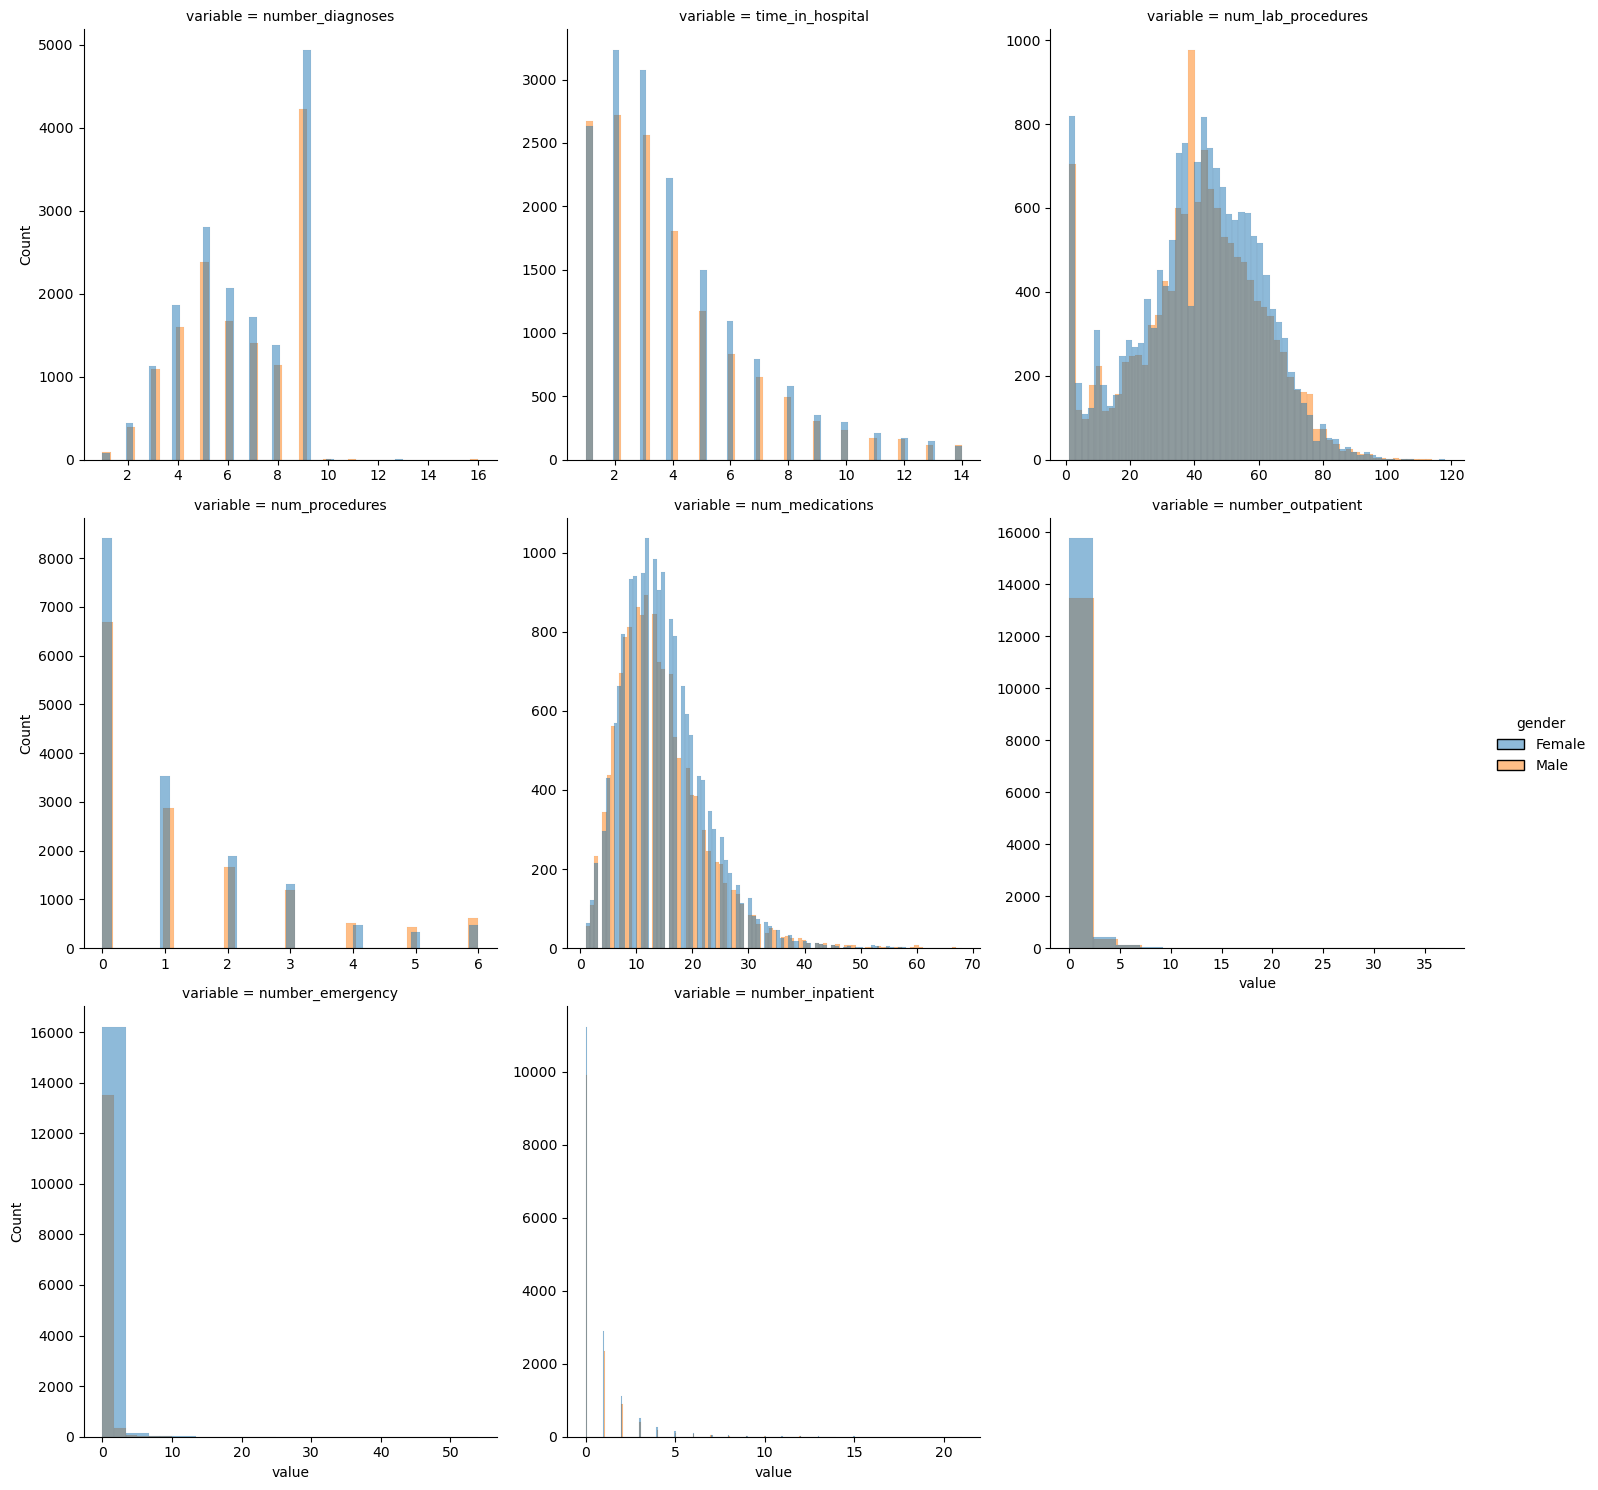

In [17]:
displot(hue='gender', alpha=0.5)
plt.show()

C:\Users\weitz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


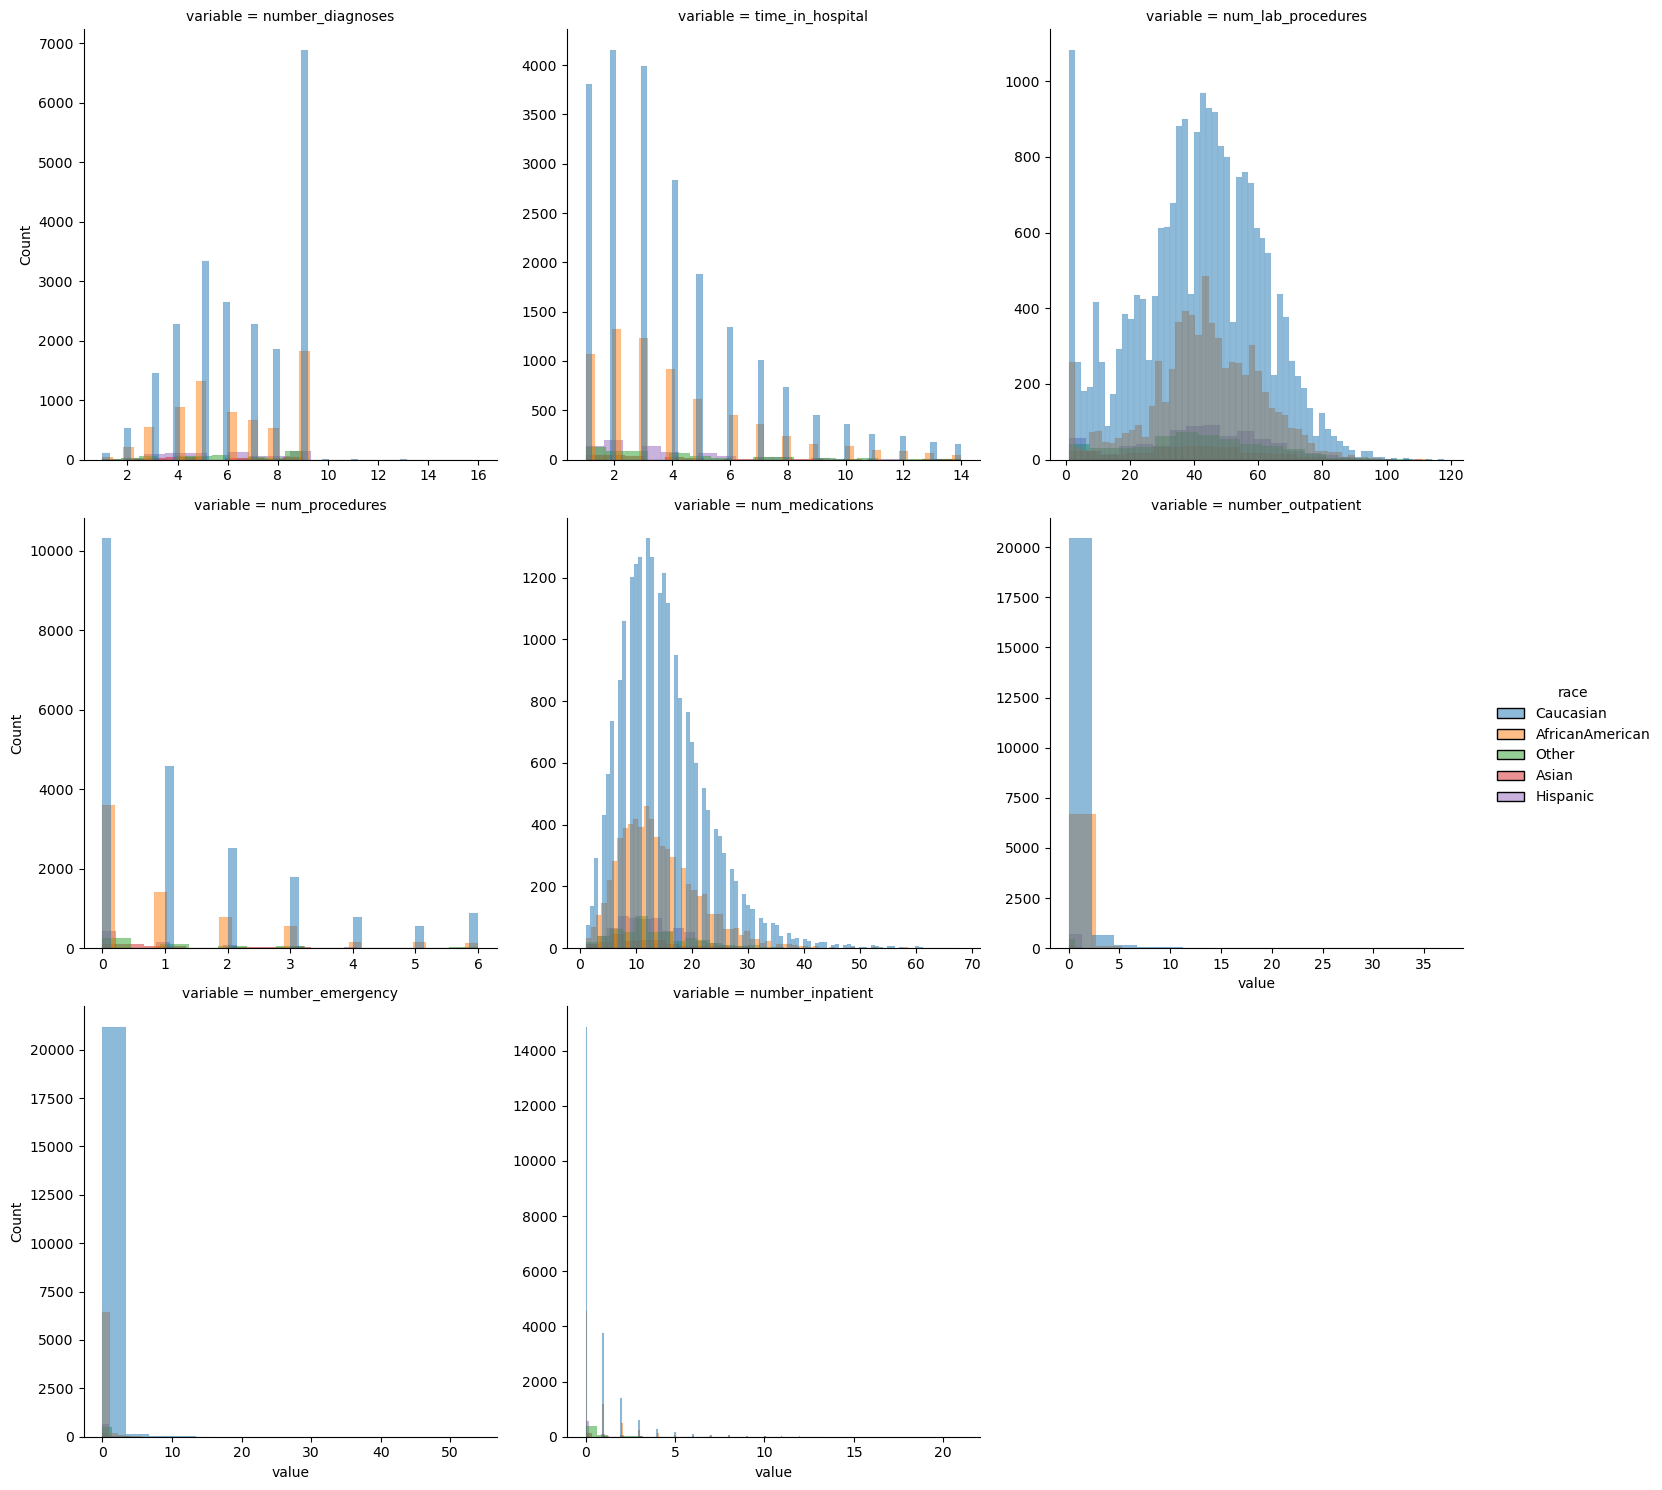

In [18]:
displot(hue='race', alpha=0.5)
plt.show()

C:\Users\weitz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


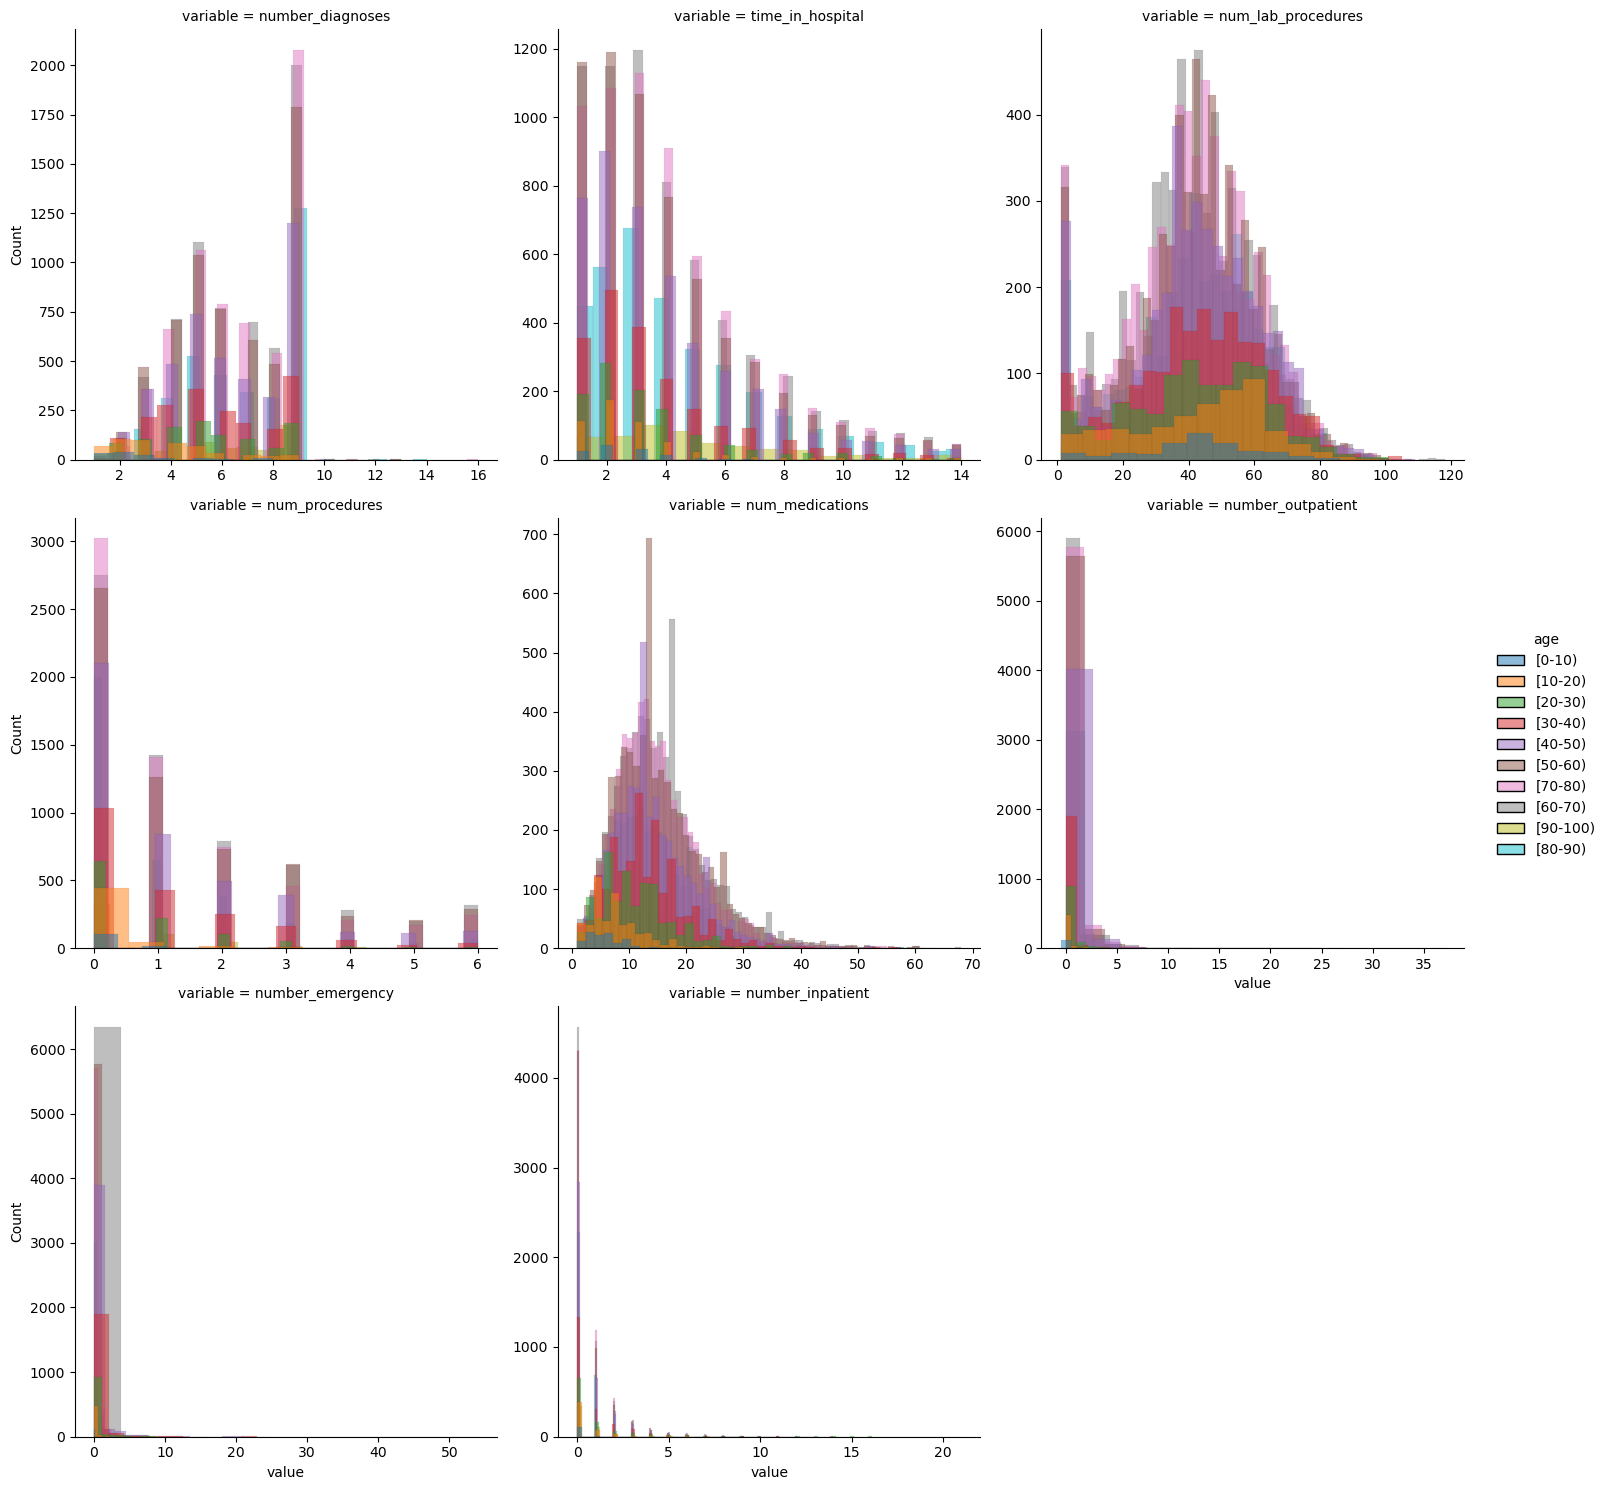

In [21]:
displot(hue='age', alpha=0.5)
plt.show()

